<a href="https://colab.research.google.com/github/AishaLichtner/projects-2019/blob/master/Bicicletas_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive



In [7]:
#access drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#VARIABLES
year_one = '2014'
year_two = '2016'
N = 10
path = "/content/drive/My Drive/data/"




#Load data

In [9]:
def load_data(path, year):

  data= pd.read_csv( path + year + ".csv", sep = ',', encoding="utf-8-sig")
  return data

In [73]:
stations = load_data(path+"Stations_", year_one)
data = load_data(path+"OD_", year_one)
station_cond = pd.read_json(path+"stations.json")



In [74]:
station_cond.tail()

,stations,schemeSuspended,timestamp
514,"{'id': 590, 's': 'Fullum / Jean Langlois', 'n'...",False,2017-11-07 16:03:34.656
515,"{'id': 591, 's': 'Hochelaga / Chapleau', 'n': ...",False,2017-11-07 16:03:34.656
516,"{'id': 592, 's': 'Gauvin / Notre-Dame', 'n': '...",False,2017-11-07 16:03:34.656
517,"{'id': 593, 's': 'President-Kennedy / Robert B...",False,2017-11-07 16:03:34.656
518,"{'id': 594, 's': 'Lincoln / Lambert Closse', '...",False,2017-11-07 16:03:34.656


In [57]:
station_cond.tail()

,id,s,n,st,b,su,m,lu,lc,bk,bl,la,lo,da,dx,ba,bx
514,590,Fullum / Jean Langlois,7077,1,False,False,False,1510065116389,1510070421547,False,False,45.526128,-73.546002,18,0,1,0
515,591,Hochelaga / Chapleau,7078,1,False,False,False,1510062468859,1510070376173,False,False,45.534453,-73.559652,15,0,0,0
516,592,Gauvin / Notre-Dame,7079,1,False,False,False,1510069862345,1510070582981,False,False,45.500043,-73.560412,3,0,24,0
517,593,President-Kennedy / Robert Bourassa,7080,1,False,False,False,1510070104151,1510070597166,False,False,45.504407,-73.572543,9,0,14,0
518,594,Lincoln / Lambert Closse,7081,1,False,False,False,1510070228268,1510070469215,False,False,45.491384,-73.586013,7,0,12,0


In [61]:
stations.tail()

,code,name,latitude,longitude
454,6136,Métro Laurier (Rivard / Laurier),45.527616,-73.589115
455,6743,St-Marc / Sherbrooke,45.494514,-73.583368
456,6051,de Gaspé / Marmier,45.529686,-73.601728
457,6178,Rivard / Rachel,45.522278,-73.577591
458,6226,Hôpital Maisonneuve-Rosemont (Rosemont / Chate...,45.575707,-73.561562


In [62]:

#Create dict for station names
station_dict = pd.Series(stations.name.values,index=stations.code).to_dict()

In [63]:

data.tail()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
3136271,3136271,2014-11-15 23:57,6073,2014-11-16 00:09,6119,737,1
3136272,3136272,2014-11-15 23:57,6156,2014-11-16 00:22,6103,1526,1
3136273,3136273,2014-11-15 23:57,6211,2014-11-16 00:07,6015,598,1
3136274,3136274,2014-11-15 23:58,6421,2014-11-16 00:04,6912,362,1
3136275,3136275,2014-11-15 23:54,6280,2014-11-16 00:03,6154,538,1


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136276 entries, 0 to 3136275
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   start_date          object
 2   start_station_code  int64 
 3   end_date            object
 4   end_station_code    int64 
 5   duration_sec        int64 
 6   is_member           int64 
dtypes: int64(5), object(2)
memory usage: 167.5+ MB


In [10]:
data.shape

(3136276, 7)

In [11]:
#remove incomplete lines
data.dropna()


,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,0,2014-04-15 00:01,6209,2014-04-15 00:18,6436,1061,1
1,1,2014-04-15 00:01,6214,2014-04-15 00:11,6248,615,1
2,2,2014-04-15 00:01,6164,2014-04-15 00:18,6216,1031,1
3,3,2014-04-15 00:01,6214,2014-04-15 00:24,6082,1382,1
4,4,2014-04-15 00:02,6149,2014-04-15 00:08,6265,347,1
...,...,...,...,...,...,...,...
3136271,3136271,2014-11-15 23:57,6073,2014-11-16 00:09,6119,737,1
3136272,3136272,2014-11-15 23:57,6156,2014-11-16 00:22,6103,1526,1
3136273,3136273,2014-11-15 23:57,6211,2014-11-16 00:07,6015,598,1
3136274,3136274,2014-11-15 23:58,6421,2014-11-16 00:04,6912,362,1


#Histogram of travel times

(-294.9214880952381, 7195.0)

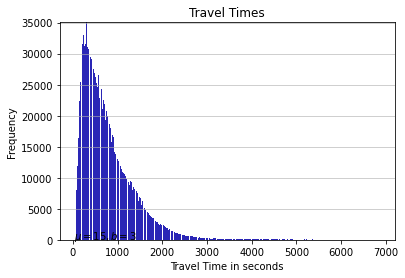

In [84]:
duration = data["duration_sec"]

n, bins, patches = plt.hist(x=duration, bins='auto', color='#0500aa',
                            alpha=0.85, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Travel Time in seconds')
plt.ylabel('Frequency')
plt.title('Travel Times')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq =n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(right = duration.max())



Most used start station 




In [13]:
most_used_start = data.start_station_code.value_counts()[:N].index.tolist()

Most used end station

In [14]:
most_used_end = data.end_station_code.value_counts()[:N].index.tolist()

Most used station general

In [17]:
#Concatinate Colums of start and end stations
all_stat = pd.concat([data.start_station_code, data.end_station_code])



In [18]:
most_used_gen = all_stat.value_counts()[:N].index.tolist()

In [19]:
def map_station(station_code_list):
  return pd.DataFrame([station_dict[x] for x in station_code_list ])
  

In [20]:
def map_trip(trip_codes):
  df= pd.DataFrame()
  df["trip codes"] = trip_codes
  df[" trips"] = [station_dict[int(x.split('-')[0])]+' -> '+ station_dict[int(x.split('-')[0])] for x  in trip_codes]
  df.style.set_caption(str(N) +" Most FRequent Trips")
  return df
 #return pd.DataFrame(trip_codes,[station_dict[int(x.split('-')[0])]+' -> '+ station_dict[int(x.split('-')[0])] for x  in trip_codes])


In [21]:
map_station(most_used_start)

,0
0,Métro Mont-Royal (Rivard / du Mont-Royal)
1,de Maisonneuve / de Bleury
2,de Maisonneuve / Stanley
3,Square St-Louis
4,Mackay /de Maisonneuve (Sud)
5,du Mont-Royal / Clark
6,Métro St-Laurent (de Maisonneuve / St-Laurent)
7,St-Dominique / Rachel
8,St-André / Laurier
9,Marquette / du Mont-Royal


In [22]:
map_station(most_used_end)

,0
0,Métro Mont-Royal (Rivard / du Mont-Royal)
1,de Maisonneuve / de Bleury
2,de Maisonneuve / Stanley
3,Métro St-Laurent (de Maisonneuve / St-Laurent)
4,Berri / de Maisonneuve
5,St-Urbain / René-Lévesque
6,Mackay /de Maisonneuve (Sud)
7,Square Victoria
8,Métro Place-d'Armes (Viger / St-Urbain)
9,Ste-Catherine / St-Hubert


In [23]:
map_station(most_used_gen)

,0
0,Métro Mont-Royal (Rivard / du Mont-Royal)
1,de Maisonneuve / de Bleury
2,de Maisonneuve / Stanley
3,Métro St-Laurent (de Maisonneuve / St-Laurent)
4,Mackay /de Maisonneuve (Sud)
5,Berri / de Maisonneuve
6,Square St-Louis
7,St-Urbain / René-Lévesque
8,du Mont-Royal / Clark
9,Roy / St-Laurent


# N Top Trips


In [24]:
trips =data.start_station_code.apply(str) +'-'+ data.end_station_code.apply(str)


In [22]:

trips.tail()

3136271    6073-6119
3136272    6156-6103
3136273    6211-6015
3136274    6421-6912
3136275    6280-6154
dtype: object

In [23]:
data['trip_code'] = trips

In [24]:
data.tail()


,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,trip_code
3136271,3136271,2014-11-15 23:57,6073,2014-11-16 00:09,6119,737,1,6073-6119
3136272,3136272,2014-11-15 23:57,6156,2014-11-16 00:22,6103,1526,1,6156-6103
3136273,3136273,2014-11-15 23:57,6211,2014-11-16 00:07,6015,598,1,6211-6015
3136274,3136274,2014-11-15 23:58,6421,2014-11-16 00:04,6912,362,1,6421-6912
3136275,3136275,2014-11-15 23:54,6280,2014-11-16 00:03,6154,538,1,6280-6154


In [25]:
#most frequent trips 
map_trip(data.trip_code.value_counts()[:N].index.tolist())

,trip codes,trips
0,6501-6501,Métro Jean-Drapeau -> Métro Jean-Drapeau
1,6026-6026,de la Commune / Place Jacques-Cartier -> de la...
2,6155-6184,Garnier / du Mont-Royal -> Garnier / du Mont-R...
3,6154-6184,Marquette / du Mont-Royal -> Marquette / du Mo...
4,6064-6100,de Maisonneuve / Stanley -> de Maisonneuve / S...
5,6396-6398,Métro Pie-IX (Pierre-de-Coubertin / Pie-IX) ->...
6,6184-6155,Métro Mont-Royal (Rivard / du Mont-Royal) -> M...
7,6184-6154,Métro Mont-Royal (Rivard / du Mont-Royal) -> M...
8,6064-6194,de Maisonneuve / Stanley -> de Maisonneuve / S...
9,6100-6064,Mackay /de Maisonneuve (Sud) -> Mackay /de Mai...


#Find rush hour

In [25]:
def seperate_date(dates):
  
  #datetime.datetime.strptime(dates ,'%Y-%M-%D %H:%M')
  #time = dates.hour

     date = []
     time = [] 
  
     for x in dates:
       date.append(x.split(' ')[0])
       time.append(datetime.datetime.strptime((x.split(' ')[1]), '%H:%M'))

     return date,time




In [67]:
data["start_date"] = pd.to_datetime(data.start_date)
data["start_hour"]= data.start_date.dt.hour


Times when  most bikes are rented

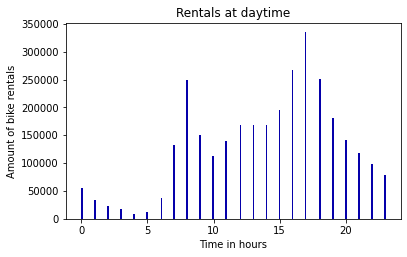

In [68]:
# beautify the x-labels
plt.gcf().autofmt_xdate()

n, bins, patches = plt.hist(x=data.start_hour, bins='auto', color='#0500aa')
#plt.grid(axis='y', alpha=0.75)


plt.xlabel('Time in hours')
plt.ylabel('Amount of bike rentals')
plt.title('Rentals at daytime')
plt.show()

maxfreq =n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
#plt.xlim(right = data.start_time.max())



# Compare Usage between 2 years


,start_station_code
6184,45600
6078,33241
6064,32055
6214,28224
6100,27072
...,...
5004,187
6750,162
6928,24
6240,22


In [117]:
def travels_per_station(data):
  return pd.DataFrame(data["start_station_code"].value_counts())
  


In [102]:
def convert_station_con_to_DF():
  stat = pd.DataFrame(station_cond.stat)
  print(stat)
  stat= pd.DataFrame.from_dict(stat)
  stat = pd.DataFrame.from_records(stat)
  return stat

In [100]:
station_cond

,stations,schemeSuspended,timestamp
0,"{'id': 1, 's': 'Hôtel-de-Ville 2 (du Champs-de...",False,2017-11-07 16:03:34.656
1,"{'id': 2, 's': 'Ste-Catherine / Dézéry', 'n': ...",False,2017-11-07 16:03:34.656
2,"{'id': 3, 's': 'Clark / Evans', 'n': '6003', '...",False,2017-11-07 16:03:34.656
3,"{'id': 4, 's': 'Hôtel-de-Ville (du Champs-de-M...",False,2017-11-07 16:03:34.656
4,"{'id': 6, 's': '18e avenue / Rosemont', 'n': '...",False,2017-11-07 16:03:34.656
...,...,...,...
514,"{'id': 590, 's': 'Fullum / Jean Langlois', 'n'...",False,2017-11-07 16:03:34.656
515,"{'id': 591, 's': 'Hochelaga / Chapleau', 'n': ...",False,2017-11-07 16:03:34.656
516,"{'id': 592, 's': 'Gauvin / Notre-Dame', 'n': '...",False,2017-11-07 16:03:34.656
517,"{'id': 593, 's': 'President-Kennedy / Robert B...",False,2017-11-07 16:03:34.656


In [101]:
stat_con_df = convert_station_con_to_DF()

                                              stations  ...               timestamp
0    {'id': 1, 's': 'Hôtel-de-Ville 2 (du Champs-de...  ... 2017-11-07 16:03:34.656
1    {'id': 2, 's': 'Ste-Catherine / Dézéry', 'n': ...  ... 2017-11-07 16:03:34.656
2    {'id': 3, 's': 'Clark / Evans', 'n': '6003', '...  ... 2017-11-07 16:03:34.656
3    {'id': 4, 's': 'Hôtel-de-Ville (du Champs-de-M...  ... 2017-11-07 16:03:34.656
4    {'id': 6, 's': '18e avenue / Rosemont', 'n': '...  ... 2017-11-07 16:03:34.656
..                                                 ...  ...                     ...
514  {'id': 590, 's': 'Fullum / Jean Langlois', 'n'...  ... 2017-11-07 16:03:34.656
515  {'id': 591, 's': 'Hochelaga / Chapleau', 'n': ...  ... 2017-11-07 16:03:34.656
516  {'id': 592, 's': 'Gauvin / Notre-Dame', 'n': '...  ... 2017-11-07 16:03:34.656
517  {'id': 593, 's': 'President-Kennedy / Robert B...  ... 2017-11-07 16:03:34.656
518  {'id': 594, 's': 'Lincoln / Lambert Closse', '...  ... 2017-11-07 16:03

In [94]:
stat_con_df 

,stations
0,"{'id': 1, 's': 'Hôtel-de-Ville 2 (du Champs-de..."
1,"{'id': 2, 's': 'Ste-Catherine / Dézéry', 'n': ..."
2,"{'id': 3, 's': 'Clark / Evans', 'n': '6003', '..."
3,"{'id': 4, 's': 'Hôtel-de-Ville (du Champs-de-M..."
4,"{'id': 6, 's': '18e avenue / Rosemont', 'n': '..."
...,...
514,"{'id': 590, 's': 'Fullum / Jean Langlois', 'n'..."
515,"{'id': 591, 's': 'Hochelaga / Chapleau', 'n': ..."
516,"{'id': 592, 's': 'Gauvin / Notre-Dame', 'n': '..."
517,"{'id': 593, 's': 'President-Kennedy / Robert B..."


In [ ]:
amount_bikes_in_Station(6240)

In [83]:
def amount_bikes_in_Station(station_code):
  bikes = 0
  bikes = stat_con_df.loc[stat_con_df['id'] == station_code]['ba']
  return bikes
 

In [40]:
def total_amount_bikes(stations):
  total=0
  for x in stations:
   total= total+ amount_bikes_in_Station(x['station_code'])



In [ ]:
def travels_stat_bike(data_one, data_two,station_one, station_two year_one, year_two):

  ratio_one= data_one.size/station_one.size
  ratio_two = data_two.size/station_two.size

In [13]:
def run_compare( year_one, year_two):
  #data loading
  data_one = load_data( path+"OD_", year_one)
  data_two = load_data(path_data+"OD_" , year_two)
  stations_one= load_data( path+"Stations_", year_one)
  stations_two= load_data( path+"Stations_", year_two)
  #comparing
  total_travels_comp(data_one, data_two, year_one, year_two)
  total_usage_comp(data_one, data_two, year_one, year_two)


  travels_pre_stat_one = travels_per_station(data_one)
  travel_per_stat_two  = travels_per_station(data_two)

  



In [132]:
def total_travels_comp(data_one, data_two, year_one, year_two):
  total_travels_one = data_one.size
  total_travels_two = data_two.size

  #plot results
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.set_ylabel('Total Travels in Millions')
  ax.set_title('Total Travels per Year')
  langs = [year_one, year_two]
  travels = [total_travels_one,total_travels_two]
  ax.bar(langs,travels)
  plt.show()





In [137]:
def total_usage_comp(data_one, data_two, year_one, year_two):
    total_usage_one = data_one["duration_sec"].sum()
    total_usage_two = data_two["duration_sec"].sum()
    print(total_usage_one)
     #plot results
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel('Seconds')
    ax.set_title('Total Usage in Seconds per Year')
    langs = [year_one, year_two]
    travels = [total_usage_one,total_usage_two]
    ax.bar(langs,travels)
    plt.show()



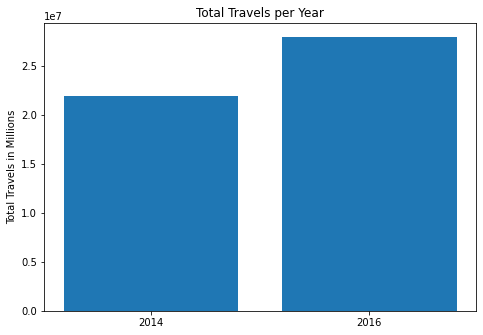

2476839795


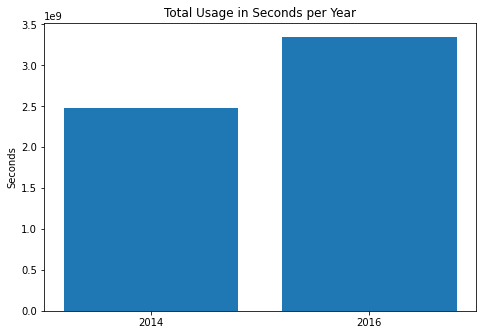

In [138]:
run_compare('2014','2016')